[![Open In colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaML/2_Matrices/Matrices.ipynb)

# Matrices

Una matriz es un arreglo rectangular de escalares (es decir, cualquier número: entero, real o complejo) dispuestos en filas y columnas, por ejemplo:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

También puede pensar en una matriz como una lista de vectores: la matriz anterior contiene 2 vectores 3D horizontales o 3 vectores 2D verticales.

Las matrices son convenientes y muy eficientes para ejecutar operaciones en muchos vectores a la vez. También veremos que son excelentes para representar y realizar transformaciones lineales como rotaciones, traslaciones y escalas.

## Matrices en python
En python, una matriz se puede representar de varias formas. El más simple es solo una lista de listas de python:

In [ ]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

En python, una matriz se puede representar de varias formas. El más simple es solo una lista de listas de python:


In [ ]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

Por convención, las matrices generalmente tienen nombres en mayúsculas, como $A$.

En el resto de este tutorial, asumiremos que estamos usando arreglos NumPy (tipo `ndarray`) para representar matrices.

## Tamaño
El tamaño de una matriz se define por su número de filas y número de columnas. Se anota $filas \veces columnas$. Por ejemplo, la matriz $A$ anterior es un ejemplo de una matriz de $2 \times 3$: 2 filas, 3 columnas. Precaución: una matriz de $3 \times 2$ tendría 3 filas y 2 columnas.

Para obtener el tamaño de una matriz en NumPy:

In [ ]:
A.shape

(2, 3)

**Precaución**: el atributo `size` representa el número de elementos en el `ndarray`, no el tamaño de la matriz:

In [ ]:
A.size

6

## Indexación de elementos
El número ubicado en la fila $i^{th}$ y la columna $j^{th}$ de una matriz $X$ a veces se indica como $X_{i,j}$ o $X_{ij}$, pero no no es una notación estándar, por lo que la gente suele preferir nombrar explícitamente los elementos, así: "*Sea $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$*". Esto significa que $X$ es igual a:

$X = \begin{bmatrix}
   x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
   x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
   x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

Sin embargo, en este notebook usaremos la notación $X_{i,j}$, ya que coincide bastante bien con la notación de NumPy. Tenga en cuenta que en matemáticas, los índices generalmente comienzan en 1, pero en programación generalmente comienzan en 0. Entonces, para acceder a $A_{2,3}$ mediante programación, debemos escribir esto:

In [ ]:
A[1,2]  # 2da fila, 3ra columna

60

El vector de  la fila $i^{ésima}$ a veces se anota como $M_i$ o $M_{i,*}$, pero nuevamente no hay una notación estándar, por lo que las personas prefieren definir explícitamente sus propios nombres, por ejemplo: "*Sea **x**$_{i}$ el $i^{ésimo}$ vector fila  de la matriz $X$*". Usaremos $M_{i,*}$, por la misma razón que la anterior. Por ejemplo, para acceder a $A_{2,*}$ (es decir, el vector de la segunda fila de $A$):

In [ ]:
A[1, :]  # Vector de segunda fila (como una matriz 1D)

array([40, 50, 60])

De manera similar, el $j^{ésimo}$ vector de columna a veces se indica como $M^j$ o $M_{*,j}$, pero no existe una notación estándar. Usaremos $M_{*,j}$. Por ejemplo, para acceder a $A_{*,3}$ (es decir, el vector de la tercera columna de $A$):

In [ ]:
A[:, 2]  # 3er vector de columna (como una matriz 1D)

array([30, 60])

Tenga en cuenta que el resultado es en realidad una matriz NumPy unidimensional: no existe una matriz unidimensional *vertical* u *horizontal*. Si realmente necesita representar un vector de fila como una matriz de una fila (es decir, una matriz 2D NumPy), o un vector de columna como una matriz de una columna, entonces necesita usar un slice en lugar de un índice al acceder a la fila o columna, por ejemplo:

In [ ]:
A[1:2, :]  # filas 2 a 3 (excluidas): esto devuelve la fila 2 como una matriz de una fila

array([[40, 50, 60]])

In [ ]:
A[:, 2:3]  # columnas 3 a 4 (excluidas): esto devuelve la columna 3 como una matriz de una columna

array([[30],
       [60]])

## Matrices cuadradas, triangulares, diagonales e identidad
Una **matriz cuadrada** es una matriz que tiene el mismo número de filas y columnas, por ejemplo, una matriz de $3 \times 3$:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

Una **matriz triangular superior** es un tipo especial de matriz cuadrada donde todos los elementos *debajo* de la diagonal principal (de arriba a la izquierda a abajo a la derecha) son cero, por ejemplo:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

De manera similar, una **matriz triangular inferior** es una matriz cuadrada donde todos los elementos *encima* de la diagonal principal son cero, por ejemplo:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

Una **matriz triangular** es una que es triangular inferior o triangular superior.

Una matriz que es tanto triangular superior como inferior se denomina **matriz diagonal**, por ejemplo:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

Puede construir una matriz diagonal usando la función `diag` de NumPy:

In [ ]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

Si pasa una matriz a la función `diag`, felizmente extraerá los valores diagonales:

In [ ]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Finalmente, la **matriz identidad** de tamaño $n$, indicada como $I_n$, es una matriz diagonal de tamaño $n \times n$ con $1$ en la diagonal principal, por ejemplo $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

La función `eye` de Numpy devuelve la matriz de identidad del tamaño deseado:

In [ ]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

La matriz de identidad a menudo se indica simplemente como $I$ (en lugar de $I_n$) cuando su tamaño es claro dado el contexto. Se llama la matriz *identidad* porque al multiplicar una matriz con ella, la matriz permanece sin cambios, como veremos a continuación.

## Sumando matrices
Si dos matrices $Q$ y $R$ tienen el mismo tamaño $m \times n$, se pueden sumar. La suma se realiza *elemento a elemento*: el resultado también es una matriz $m \times n$ $S$ donde cada elemento es la suma de los elementos en la posición correspondiente: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

Por ejemplo, creemos una matriz de $2 \times 3$ $B$ y calculemos $A + B$:

In [ ]:
# iterar sobre las filas
for i in range(len(X)):
   # iterar sobre las columnas
   for j in range(len(X[0])):
       result[i][j] = X[i][j] + Y[i][j]

In [ ]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [ ]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

**La suma es *conmutativa***, lo que significa que $A + B = B + A$:

In [ ]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

**También es *asociativo***, lo que significa que $A + (B + C) = (A + B) + C$:

In [ ]:
C = np.array([[100,200,300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [ ]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

## Multiplicación por un escalar
Una matriz $M$ se puede multiplicar por un escalar $\lambda$. El resultado se anota $\lambda M$, y es una matriz del mismo tamaño que $M$ con todos los elementos multiplicados por $\lambda$:

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$

Una forma más concisa de escribir esto es:

$(\lambda M)_{i,j} = \lambda (M)_{i,j}$

En NumPy, simplemente use el operador `*` para multiplicar una matriz por un escalar. Por ejemplo:

In [ ]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

La multiplicación escalar también se define en el lado derecho y da el mismo resultado: $M \lambda = \lambda M$. Por ejemplo:

In [ ]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Esto hace que la multiplicación escalar sea **conmutativa**.

También es **asociativa**, lo que significa que $\alpha (\beta M) = (\alpha \times \beta) M$, donde $\alpha$ y $\beta$ son escalares. Por ejemplo:

In [1]:
2 * (3 * A)

NameError: name 'A' is not defined

In [ ]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Finalmente, es **distributiva sobre la suma** de matrices, lo que significa que $\lambda (Q + R) = \lambda Q + \lambda R$:

In [ ]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [ ]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

## Multiplicación de matrices
Hasta ahora, las operaciones matriciales han sido bastante intuitivas. Pero multiplicar matrices es un poco más complicado.

Una matriz $Q$ de tamaño $m \times n$ se puede multiplicar por una matriz $R$ de tamaño $n \times q$. Se anota simplemente $QR$ sin signo de multiplicación ni punto. El resultado $P$ es una matriz $m \times q$ donde cada elemento se calcula como una suma de productos:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

El elemento en la posición $i,j$ en la matriz resultante es la suma de los productos de los elementos en la fila $i$ de la matriz $Q$ por los elementos en la columna $j$ de la matriz $R$.

![Alt Text](https://numbas.mathcentre.ac.uk/media/question-resources/Matrix_Multiplication_02.gif)


Puedes notar que cada elemento $P_{i,j}$ es el producto escalar del vector fila $Q_{i,*}$ y el vector columna $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

Entonces podemos reescribir $P$ de manera más concisa como:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Multipliquemos dos matrices en NumPy, usando el método `dot` de `ndarray`:
$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [ ]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Verifiquemos este resultado mirando un elemento, solo para estar seguros: mirando $E_{2,3}$ por ejemplo, necesitamos multiplicar los elementos en la $2^{da}$ fila de $A$ por los elementos en la $3^{ra}$ columna de D y suma estos productos:

In [ ]:
40*5 + 50*17 + 60*31

2910

In [ ]:
E[1,2]  # fila 2, columna 3

2910

¡Se ve bien! Puedes comprobar los otros elementos hasta que te acostumbres al algoritmo.

Multiplicamos una matriz de $2 \times 3$ por una matriz de $3 \times 4$, por lo que el resultado es una matriz de $2 \times 4$. El número de columnas de la primera matriz tiene que ser igual al número de filas de la segunda matriz. Si intentamos multiplicar $D$ por $A$, obtenemos un error porque D tiene 4 columnas mientras que A tiene 2 filas:

In [ ]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


Esto ilustra el hecho de que **la multiplicación de matrices *NO* es conmutativa**: en general $QR ≠ RQ$

De hecho, $QR$ y $RQ$ solo están *ambos* definidos si $Q$ tiene el tamaño $m \times n$ y $R$ tiene el tamaño $n \times m$. Veamos un ejemplo en el que ambos *están* definidos y mostramos que (en general) *NO* son iguales:

In [ ]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [ ]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

Por otro lado, **la multiplicación de matrices *es* asociativa**, lo que significa que $Q(RS) = (QR)S$. Vamos a crear una matriz de $4 \times 5$ $G$ para ilustrar esto:

In [ ]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.dot(D).dot(G)     # (AB)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [ ]:
A.dot(D.dot(G))     # A(BG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

También es ***distributivo* sobre la suma** de matrices, lo que significa que $(Q + R)S = QS + RS$. Por ejemplo:

In [ ]:
(A + B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [ ]:
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

El producto de una matriz $M$ por la matriz identidad (de igual tamaño) da como resultado la misma matriz $M$. Más formalmente, si $M$ es una matriz $m \times n$, entonces:

$M I_n = I_m M = M$

Esto generalmente se escribe de manera más concisa (ya que el tamaño de las matrices de identidad no es ambiguo dado el contexto):

$MI = MI = M$

Por ejemplo:

In [ ]:
A.dot(np.eye(3))

array([[ 10.,  20.,  30.],
       [ 40.,  50.,  60.]])

In [ ]:
np.eye(2).dot(A)

array([[ 10.,  20.,  30.],
       [ 40.,  50.,  60.]])

**Precaución**: el operador `*` de NumPy realiza multiplicaciones por elementos, *NO* una multiplicación de matrices:

In [ ]:
A * B   # NO es una multiplicación de matrices

array([[ 10,  40,  90],
       [160, 250, 360]])

**El operador infijo @**

Python 3.5 [introdujo](https://docs.python.org/3/whatsnew/3.5.html#pep-465-a-dedicated-infix-operator-for-matrix-multiplication) el operador infijo `@` para la multiplicación de matrices, y NumPy 1.10 agregó soporte para ello. Si está utilizando Python 3.5+ y NumPy 1.10+, simplemente puede escribir `A @ D` en lugar de `A.dot(D)`, lo que hace que su código sea mucho más legible (pero menos portátil). Este operador también funciona para productos de puntos vectoriales.

In [ ]:
import sys
print("Python version: {}.{}.{}".format(*sys.version_info))
print("Numpy version:", np.version.version)

# Descomente la siguiente línea si su versión de Python es ≥3.5
# y su versión de NumPy es ≥1.10:

#A @ D

Python version: 3.5.3
Numpy version: 1.12.1


Nota: `Q @ R` es en realidad equivalente a `Q.__matmul__(R)`, que NumPy implementa como `np.matmul(Q, R)`, no como `Q.dot(R)`. La principal diferencia es que `matmul` no soporta la multiplicación escalar, mientras que `dot` sí, así que puedes escribir `Q.dot(3)`, que es equivalente a `Q * 3`, pero no puedes escribir `Q @ 3` ([más detalles](http://stackoverflow.com/a/34142617/38626)).

## Matriz transpuesta
La transpuesta de una matriz $M$ es una matriz denominada $M^T$ tal que la fila $i^{th}$ en $M^T$ es igual a la columna $i^{th}$ en $M$ :

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

En otras palabras, ($A^T)_{i,j}$ = $A_{j,i}$

Obviamente, si $M$ es una matriz $m \times n$, entonces $M^T$ es una matriz $n \times m$.

Nota: hay algunas otras notaciones, como $M^t$, $M′$ o ${^t}M$.

En NumPy, la transposición de una matriz se puede obtener simplemente usando el atributo `T`:

In [ ]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [ ]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

Como era de esperar, transponer una matriz dos veces devuelve la matriz original:

In [ ]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

La transposición es distributiva sobre la suma de matrices, lo que significa que $(Q + R)^T = Q^T + R^T$. Por ejemplo:

In [ ]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [ ]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Además, $(Q \cdot R)^T = R^T \cdot Q^T$. Tenga en cuenta que el orden es inverso. Por ejemplo:

In [ ]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [ ]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

Una **matriz simétrica** $M$ se define como una matriz que es igual a su traspuesta: $M^T = M$. Esta definición implica que debe ser una matriz cuadrada cuyos elementos sean simétricos con respecto a la diagonal principal, por ejemplo:

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

El producto de una matriz por su transpuesta siempre es una matriz simétrica, por ejemplo:

In [ ]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

## Conversión de matrices 1D en matrices 2D en NumPy
Como mencionamos anteriormente, en NumPy (a diferencia de Matlab, por ejemplo), 1D realmente significa 1D: no existe tal cosa como una matriz 1D vertical o una matriz 1D horizontal. Por lo tanto, no debería sorprenderse al ver que la transposición de una matriz 1D no hace nada:

In [ ]:
u

array([2, 5])

In [ ]:
u.T

array([2, 5])

Queremos convertir $\textbf{u}$ en un vector fila antes de transponerlo. Hay algunas maneras de hacer esto:

In [ ]:
u_row = np.array([u])
u_row

array([[2, 5]])

Observe los corchetes adicionales: esta es una matriz 2D con solo una fila (es decir, una matriz de 1x2). En otras palabras, realmente es un **vector de fila**.

In [ ]:
u[np.newaxis, :]

array([[2, 5]])

Observe los corchetes adicionales: esta es una matriz 2D con solo una fila (es decir, una matriz de 1x2). En otras palabras, realmente es un **vector de fila**.

In [ ]:
u[np.newaxis]

array([[2, 5]])

Esto es equivalente, pero un poco menos explícito.

Ok, ahora transpongamos nuestro vector fila:

In [ ]:
u_row.T

array([[2],
       [5]])

¡Genial! Ahora tenemos un buen **vector de columna**.

En lugar de crear un vector de fila y luego transponerlo, también es posible convertir una matriz 1D directamente en un vector de columna:

In [ ]:
u[:, np.newaxis]

array([[2],
       [5]])

## Graficar una matriz
Ya hemos visto que los vectores se pueden representar como puntos o flechas en un espacio N-dimensional. ¿Existe una buena representación gráfica de las matrices? Bueno, simplemente puede ver una matriz como una lista de vectores, por lo que trazar una matriz da como resultado muchos puntos o flechas. Por ejemplo, creemos una matriz `P` de $2 \times 4$ y representémosla como puntos:

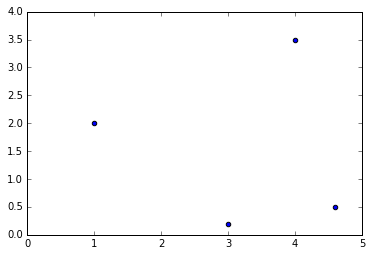

In [ ]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

Por supuesto, también podríamos haber almacenado los mismos 4 vectores como vectores de fila en lugar de vectores de columna, dando como resultado una matriz de $4 \times 2$ (la transpuesta de $P$, de hecho). Es realmente una elección arbitraria.

Como los vectores están ordenados, puedes ver la matriz como un camino y representarla con puntos conectados:

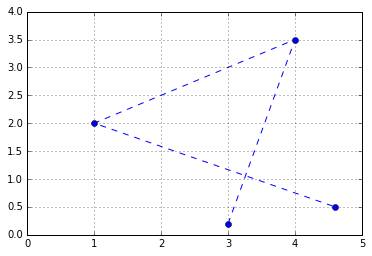

In [ ]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

O puede representarlo como un polígono: la clase `Polygon` de matplotlib espera una matriz $n \times 2$ NumPy, no una matriz $2 \times n$, por lo que solo necesitamos darle $P^T$:

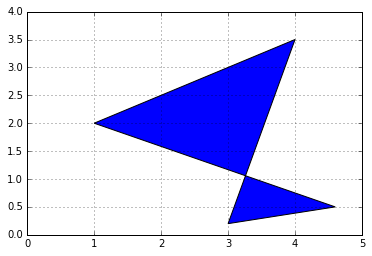

In [ ]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

## Aplicaciones geométricas de operaciones matriciales
Vimos anteriormente que la suma de vectores da como resultado una traslación geométrica, la multiplicación de vectores por un escalar da como resultado un reescalado (acercamiento o alejamiento, centrado en el origen), y el producto punto vectorial da como resultado la proyección de un vector sobre otro vector, el reescalado y la medición del resultado. coordinar.

De manera similar, las operaciones matriciales tienen aplicaciones geométricas muy útiles.

### Suma = múltiples traslaciones geométricas
Primero, sumar dos matrices es equivalente a sumar todos sus vectores. Por ejemplo, vamos a crear una matriz de $2 \times 4$ $H$ y sumarla a $P$, y ver el resultado:

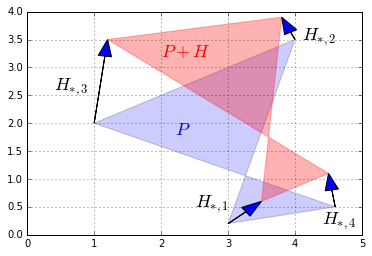

In [ ]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Si sumamos una matriz llena de vectores idénticos, obtenemos una traslación geométrica simple:

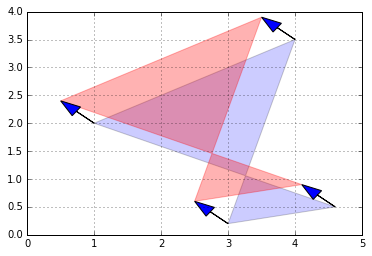

In [ ]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Aunque las matrices solo se pueden sumar si tienen el mismo tamaño, NumPy permite agregar un vector de fila o un vector de columna a una matriz: esto se denomina *difusión* y se explica con más detalles en el [tutorial de NumPy](tools_numpy.ipynb ). Podríamos haber obtenido el mismo resultado que el anterior con:

In [ ]:
P + [[-0.5], [0.4]]  # igual que P + H2, gracias a la transmisión NumPy

array([[ 2.5,  3.5,  0.5,  4.1],
       [ 0.6,  3.9,  2.4,  0.9]])

### Multiplicación por un escalar
Al multiplicar una matriz por un escalar, todos sus vectores se multiplican por ese escalar, por lo que, como era de esperar, el resultado geométrico es un cambio de escala de toda la figura. Por ejemplo, cambiemos la escala de nuestro polígono por un factor del 60 % (alejándose, centrado en el origen):

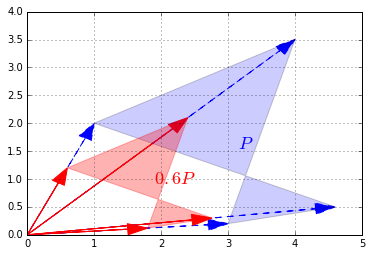

In [ ]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Multiplicación de matrices – Proyección sobre un eje
La multiplicación de matrices es más compleja de visualizar, pero también es la herramienta más poderosa de la caja.

Comencemos de manera simple, definiendo una matriz de $1 \times 2$ $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$. Este vector fila es simplemente el vector unitario horizontal.

In [ ]:
U = np.array([[1, 0]])

Ahora veamos el producto escalar $U \cdot P$:

In [ ]:
U.dot(P)

array([[ 3. ,  4. ,  1. ,  4.6]])

Estas son las coordenadas horizontales de los vectores en $P$. En otras palabras, acabamos de proyectar $P$ en el eje horizontal:

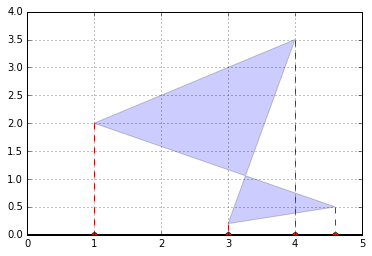

In [ ]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

De hecho, podemos proyectar en cualquier otro eje simplemente reemplazando $U$ con cualquier otro vector unitario. Por ejemplo, proyectemos sobre el eje que está en un ángulo de 30° sobre el eje horizontal:

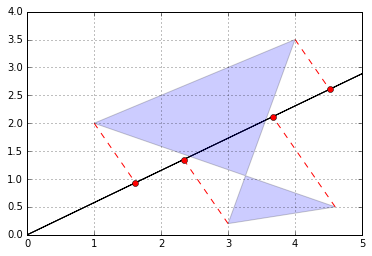

In [ ]:
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

¡Bien! Recuerda que el producto escalar de un vector unitario y una matriz básicamente realiza una proyección sobre un eje y nos da las coordenadas de los puntos resultantes sobre ese eje.

### Multiplicación de matrices – Rotación
Ahora vamos a crear una matriz $2 \times 2$ $V$ que contenga dos vectores unitarios que formen ángulos de 30° y 120° con el eje horizontal:

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [ ]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

Veamos el producto $VP$:

In [ ]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

La primera fila es igual a $V_{1,*} P$, que son las coordenadas de la proyección de $P$ sobre el eje de 30°, como hemos visto anteriormente. La segunda fila es $V_{2,*} P$, que son las coordenadas de la proyección de $P$ en el eje de 120°. ¡Así que básicamente obtuvimos las coordenadas de $P$ después de rotar los ejes horizontal y vertical 30° (o de manera equivalente después de rotar el polígono -30° alrededor del origen)! Grafiquemos $VP$ para ver esto:

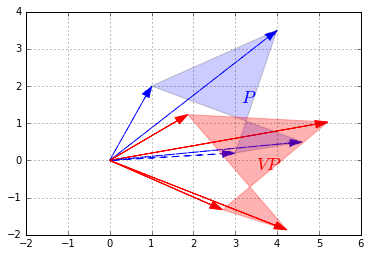

In [ ]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

La matriz $V$ se llama **matriz de rotación**.

### Multiplicación de matrices – Otras transformaciones lineales
En términos más generales, cualquier transformación lineal $f$ que mapee vectores n-dimensionales a vectores m-dimensionales puede representarse como una matriz $m \times n$. Por ejemplo, digamos que $\textbf{u}$ es un vector tridimensional:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

y $f$ se define como:

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

Esta transformación $f$ asigna vectores tridimensionales a vectores bidimensionales de forma lineal (es decir, las coordenadas resultantes solo implican sumas de múltiplos de las coordenadas originales). Podemos representar esta transformación como matriz $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Ahora, para calcular $f(\textbf{u})$ simplemente podemos hacer una multiplicación de matrices:

$f(\textbf{u}) = F \textbf{u}$

Si tenemos una matriz $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, donde cada $\textbf{u }_i$ es un vector columna tridimensional, entonces $FG$ da como resultado la transformación lineal de todos los vectores $\textbf{u}_i$ como se define en la matriz $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

Para resumir, la matriz del lado izquierdo de un producto escalar especifica qué transformación lineal aplicar a los vectores del lado derecho. Ya hemos demostrado que esto se puede usar para realizar proyecciones y rotaciones, pero cualquier otra transformación lineal es posible. Por ejemplo, aquí hay una transformación conocida como *mapeo de corte*:

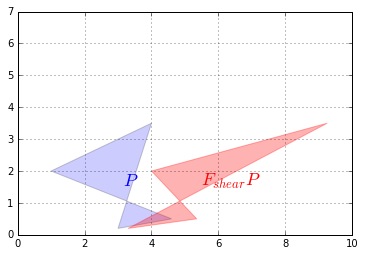

In [ ]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{de_corte} P$",
                    axis=[0, 10, 0, 7])
plt.show()

Veamos cómo esta transformación afecta a una matriz que contiene los puntos de un **cuadrado unitario**:

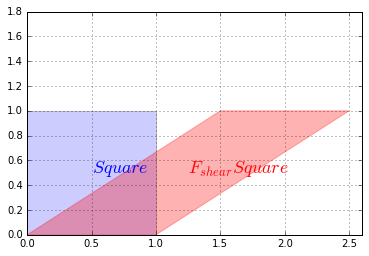

In [ ]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{de_corte} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

Ahora veamos un **mapeo de compresión**:

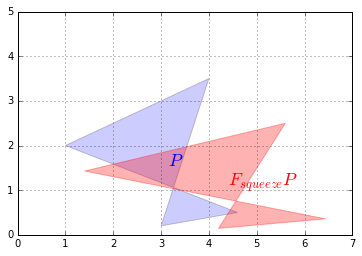

In [ ]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(P, F_squeeze.dot(P), "$P$", "$F_{de_compresion} P$",
                    axis=[0, 7, 0, 5])
plt.show()

El efecto sobre el cuadrado unitario es:

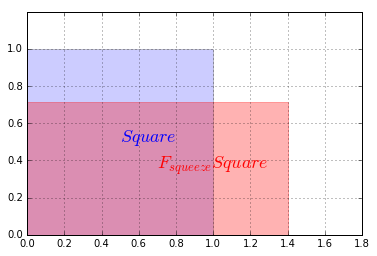

In [ ]:
plot_transformation(Square, F_squeeze.dot(Square), "$Square$", "$F_{de_compresion} Square$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

Mostremos una última: la reflexión a través del eje horizontal:

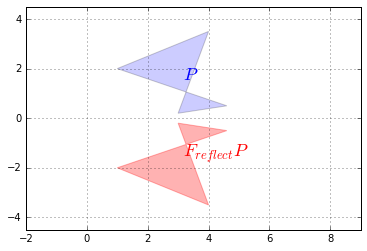

In [ ]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
plot_transformation(P, F_reflect.dot(P), "$P$", "$F_{reflexion} P$",
                    axis=[-2, 9, -4.5, 4.5])
plt.show()

## Matriz inversa
Ahora que entendemos que una matriz puede representar cualquier transformación lineal, una pregunta natural es: ¿podemos encontrar una matriz de transformación que invierta el efecto de una matriz de transformación dada $F$? La respuesta es sí… ¡a veces! Cuando existe, dicha matriz se denomina **inversa** de $F$ y se indica como $F^{-1}$.

Por ejemplo, la rotación, el mapeo de corte y el mapeo de compresión tienen transformaciones inversas. Demostremos esto en el mapeo de corte:

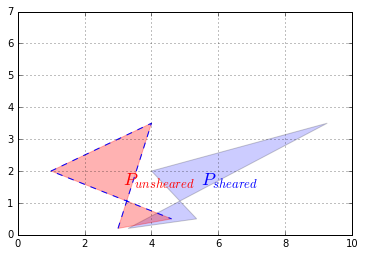

In [ ]:
F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{cortada}$", "$P_{descortada}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

Aplicamos un mapeo de corte en $P$, tal como lo hicimos antes, pero luego aplicamos una segunda transformación al resultado, y *he aquí* esto tuvo el efecto de volver al $P$ original (trazamos el esquema original de $P$ para verificar). La segunda transformación es la inversa de la primera.

Esta vez definimos la matriz inversa $F_{shear}^{-1}$ manualmente, pero NumPy proporciona una función `inv` para calcular la inversa de una matriz, por lo que podríamos haber escrito en su lugar:

In [ ]:
F_inv_shear = LA.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

Solo se pueden invertir matrices cuadradas. Esto tiene sentido cuando lo piensa: si tiene una transformación que reduce el número de dimensiones, se pierde parte de la información y no hay forma de recuperarla. Por ejemplo, digamos que usa una matriz de $2 \times 3$ para proyectar un objeto 3D en un plano. El resultado puede verse así:

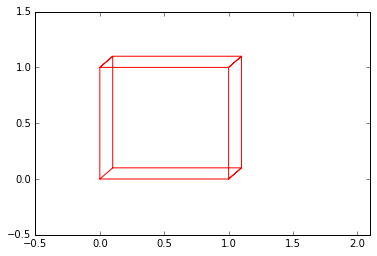

In [ ]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.show()

Mirando esta imagen, es imposible saber si se trata de la proyección de un cubo o de un objeto rectangular estrecho. Parte de la información se ha perdido en la proyección.

Incluso las matrices de transformación cuadradas pueden perder información. Por ejemplo, considere esta matriz de transformación:

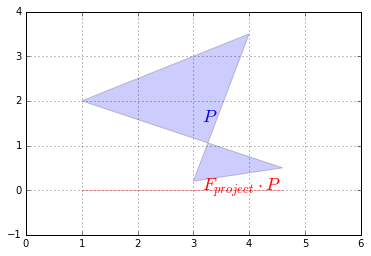

In [ ]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(P, F_project.dot(P), "$P$", "$F_{project} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

Esta matriz de transformación realiza una proyección sobre el eje horizontal. Nuestro polígono se aplana por completo, por lo que parte de la información se pierde por completo y es imposible volver al polígono original mediante una transformación lineal. En otras palabras, $F_{proyectar}$ no tiene inversa. Una matriz cuadrada de este tipo que no se puede invertir se denomina **matriz singular**. Si le pedimos a NumPy que calcule su inversa, genera una excepción:

In [ ]:
try:
    LA.inv(F_project)
except LA.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


Aquí hay otro ejemplo de una matriz singular. Éste realiza una proyección sobre el eje en un ángulo de 30° sobre el eje horizontal:

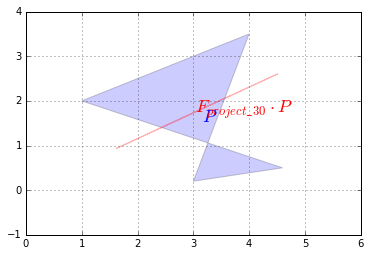

In [ ]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
plot_transformation(P, F_project_30.dot(P), "$P$", "$F_{project\_30} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

Pero esta vez, debido a errores de redondeo de punto flotante, NumPy logra calcular un inverso (sin embargo, observe cuán grandes son los elementos):

In [ ]:
LA.inv(F_project_30)

array([[  1.20095990e+16,  -2.08012357e+16],
       [ -2.08012357e+16,   3.60287970e+16]])

Como era de esperar, el producto escalar de una matriz por su inversa da como resultado la matriz identidad:

$M \cdot M^{-1} = M^{-1} \cdot M = I$

Esto tiene sentido ya que hacer una transformación lineal seguida de la transformación inversa no produce ningún cambio.

In [ ]:
F_shear.dot(LA.inv(F_shear))

array([[ 1.,  0.],
       [ 0.,  1.]])

Otra forma de expresar esto es que la inversa de la inversa de una matriz $M$ es la misma $M$:

$((M)^{-1})^{-1} = M$

In [ ]:
LA.inv(LA.inv(F_shear))

array([[ 1. ,  1.5],
       [ 0. ,  1. ]])

Además, lo contrario de escalar por un factor de $\lambda$ es, por supuesto, escalar por un factor de $\frac{1}{\lambda}$:

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

Una vez que comprende la interpretación geométrica de las matrices como transformaciones lineales, la mayoría de estas propiedades parecen bastante intuitivas.

Una matriz que es su propia inversa se llama **involución**. Los ejemplos más simples son las matrices de reflexión, o una rotación de 180°, pero también hay involuciones más complejas, por ejemplo, imagina una transformación que se comprime horizontalmente, luego se refleja sobre el eje vertical y finalmente gira 90° en el sentido de las agujas del reloj. Tome una servilleta e intente hacerlo dos veces: terminará en la posición original. Aquí está la matriz involutiva correspondiente:

In [2]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(P, F_involution.dot(P), "$P$", "$F_{involucion} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

NameError: name 'np' is not defined

Finalmente, una matriz cuadrada $H$ cuya inversa es su propia transpuesta es una **matriz ortogonal**:

$H^{-1} = H^T$

Por lo tanto:

$H \cdot H^T = H^T \cdot H = I$

Corresponde a una transformación que conserva distancias, como rotaciones y reflexiones, y combinaciones de estas, pero sin reescalar, cortar o comprimir. Verifiquemos que $F_{reflect}$ sea realmente ortogonal:

In [ ]:
F_reflect.dot(F_reflect.T)

array([[1, 0],
       [0, 1]])

## Determinante
El determinante de una matriz cuadrada $M$, anotado $\det(M)$ o $\det M$ o $|M|$ es un valor que se puede calcular a partir de sus elementos $(M_{i,j})$ usando varios métodos equivalentes. Uno de los métodos más simples es este enfoque recursivo:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

* Donde $M^{(i,j)}$ es la matriz $M$ sin fila $i$ ni columna $j$.
Por ejemplo, calculemos el determinante de la siguiente matriz $3 \times 3$:
$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Usando el método anterior, obtenemos:

$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

Ahora necesitamos calcular el determinante de cada una de estas matrices de $2 \times 2$ (estos determinantes se llaman **menores**):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Ahora podemos calcular el resultado final:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

Ahora podemos calcular el resultado final:

In [ ]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

27.0

Uno de los principales usos del determinante es *determinar* si una matriz cuadrada puede invertirse o no: si el determinante es igual a 0, entonces la matriz *no* puede invertirse (es una matriz singular), y si el determinante no es 0, entonces *puede* ser invertido.

Por ejemplo, calculemos el determinante para las matrices $F_{project}$, $F_{project\_30}$ y $F_{shear}$ que definimos anteriormente:

In [ ]:
LA.det(F_project)

0.0

Así es, $F_{project}$ es singular, como vimos antes.

In [ ]:
LA.det(F_project_30)

2.0816681711721642e-17

Este determinante está sospechosamente cerca de 0: en realidad debería ser 0, pero no lo es debido a pequeños errores de punto flotante. La matriz es en realidad singular.

In [ ]:
LA.det(F_shear)

1.0

¡Perfecto! Esta matriz *puede* ser inversa como vimos antes. ¡Guau, las matemáticas realmente funcionan!

El determinante también se puede usar para medir cuánto afecta una transformación lineal a las áreas superficiales: por ejemplo, las matrices de proyección $F_{project}$ y $F_{project\_30}$ aplanan completamente el polígono $P$, hasta que su área es cero. Es por eso que el determinante de estas matrices es 0. El mapeo de corte modificó la forma del polígono, pero no afectó su área de superficie, por lo que el determinante es 1. Puede intentar calcular el determinante de una matriz de rotación, y también debería dar 1. ¿Qué pasa con una matriz de escalado? Vamos a ver:

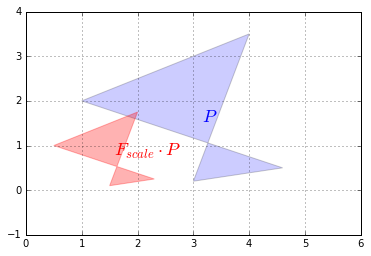

In [ ]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

Redimensionamos el polígono por un factor de 1/2 en los ejes vertical y horizontal para que el área de superficie del polígono resultante sea 1/4 de la del polígono original. Calculemos el determinante y comprobemos que:

In [ ]:
LA.det(F_scale)

0.25

¡Correcto!

El determinante en realidad puede ser negativo, cuando la transformación da como resultado una versión "volteada" del polígono original (por ejemplo, un guante de la mano izquierda se convierte en un guante de la mano derecha). Por ejemplo, el determinante de la matriz `F_reflect` es -1 porque el área de la superficie se conserva pero el polígono se voltea:

In [ ]:
LA.det(F_reflect)

-1.0